In [206]:
"""
Authors: Viktoriia Vlasenko
Index number: 317013
Date: 03.01.2024
"""


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit

@jit(nopython=True)
def hamiltonian(Psi, k, dx, kappa, omega, tau):
    return -0.5 * (Psi[k+1] + Psi[k-1] - 2*Psi[k]) / (dx**2) + kappa * (k*dx - 0.5) * Psi[k] * np.sin(omega * tau)


def calculate_Psi_R(n, k, dx):
    return np.sqrt(2)*np.sin(n*np.pi*k*dx)


def save_properties(filename, tau, norma, X, energy):
    filename.write(f'{tau}\t{norma}\t{X}\t{energy}\n')


def save_probabilities(filename, p):
    filename.write(f'{p}\n')


def run_simulation(steps, parm, p_k, Psi_R, Psi_I, H_R, H_I, N, dx, kappa, omega, tau, delta_tau, fileparameters, fileprobabilities):
    
    norma = 0
    X = 0
    energy = 0

    for s in range(0, steps):

        for k_i in range(0, N+1):
            Psi_R[k_i] = Psi_R[k_i] + H_I[k_i] * delta_tau/2
        
        
        for k_i in range(1, N):
            H_R[k_i] = hamiltonian(Psi_R, k_i, dx, kappa, omega, tau+delta_tau/2)
        
        for k_i in range(0, N+1):
            Psi_I[k_i] = Psi_I[k_i] - H_R[k_i] * delta_tau


        for k_i in range(1, N):
            H_I[k_i] = hamiltonian(Psi_I, k_i, dx, kappa, omega, tau+delta_tau)
            
        
        for k_i in range(0, N+1):
            Psi_R[k_i] = Psi_R[k_i] + H_I[k_i] * delta_tau/2
        
        
        if  not (s % parm):
            for k_i in range(1, N):
                H_R[k_i] = hamiltonian(Psi_R, k_i, dx, kappa, omega, tau)

            norma = np.sum(Psi_R**2 + Psi_I**2) * dx
            X = np.sum(np.arange(0, N + 1) * dx * (Psi_R**2 + Psi_I**2))*dx
            energy = np.sum(Psi_R * H_R + Psi_I * H_I) * dx

            save_properties(fileparameters, tau, norma, X, energy)


        if not (s % p_k):
            for i in range(0, N):
                prob = Psi_R[i]*Psi_R[i] + Psi_I[i]*Psi_I[i]
                save_probabilities(fileprobabilities, prob)

        tau += delta_tau


def main():
    N = 100
    dx = 1./N
    tau = 0
    delta_tau = 0.0001
    steps = 4000
    n = 1 
    kappa = 0
    omega = 0 #3*(np.pi**2)/2
    parm = 20
    p_k = 100


    parameters = open("parameters.txt", 'w')
    probability = open("probability.txt", 'w')

    k = np.arange(0, N + 1, 1)
  
    H_R = np.zeros(N+1)
    H_I = np.zeros(N+1)

    Psi_R = np.zeros(N+1)
    Psi_I = np.zeros(N+1)

    Psi_R = calculate_Psi_R(n, k, dx)
    Psi_R[0] = 0
    Psi_R[-1] = 0
    
   
    for k_i in range(1, N):
        H_R[k_i] = hamiltonian(Psi_R, k_i, dx, kappa, omega, tau)
        H_I[k_i] = hamiltonian(Psi_I, k_i, dx, kappa, omega, tau)


    simulation = run_simulation(steps, parm, p_k, Psi_R, Psi_I, H_R, H_I, N, dx, kappa, omega, tau, delta_tau, parameters, probability)

    parameters.close()
    probability.close()


if __name__ == "__main__":
    main()

In [207]:
def processFile(file_input):
	col_names = ['tau', 'norma', 'X', 'energy']
	df = pd.read_csv(file_input, delim_whitespace=True, skiprows = 0, names = col_names)
	return df

4.934396643044048


(4.92, 4.94)

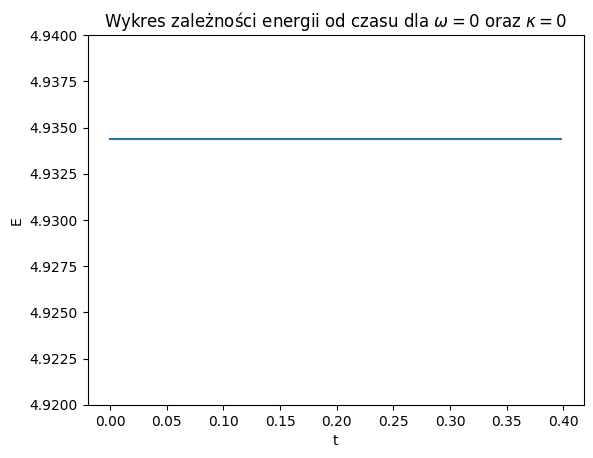

In [215]:
df = processFile("parameters.txt")
plt.plot(df['tau'], df['energy'])
plt.title(r"Wykres zależności energii od czasu dla $\omega=0$ oraz $\kappa = 0$")
plt.xlabel("t")
plt.ylabel("E")
print(np.max(df['energy']))
plt.ylim(4.92, 4.94)

(0.0, 1.5)

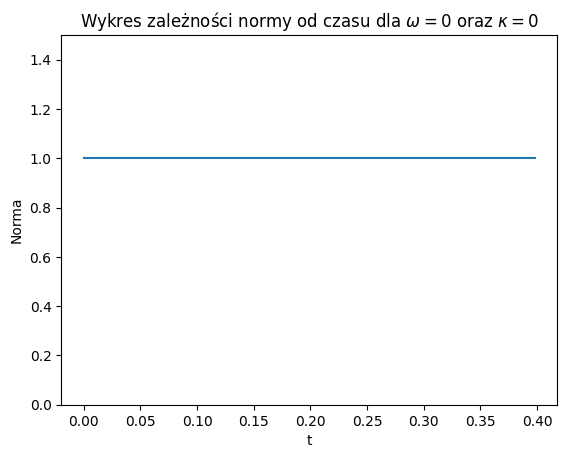

In [216]:
plt.plot(df['tau'], df['norma'])
plt.title(r"Wykres zależności normy od czasu dla $\omega=0$ oraz $\kappa = 0$")
plt.xlabel("t")
plt.ylabel("Norma")
plt.ylim(0, 1.5)

Text(0, 0.5, '$\\Delta X$')

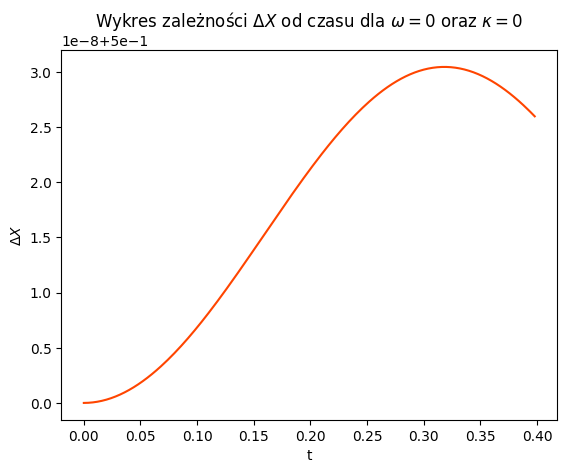

In [217]:
plt.plot(df['tau'], df['X'], color = 'orangered')
#plt.title(r"Wykres zależności $\Delta X$ od czasu dla $\omega=\frac{3\pi^2}{2}$ oraz $\kappa = 1$")
plt.title(r"Wykres zależności $\Delta X$ od czasu dla $\omega=0$ oraz $\kappa = 0$")
plt.xlabel("t")
plt.ylabel(r"$\Delta X$")
